Saving img_511.jpeg to img_511.jpeg
Saving img_531.jpeg to img_531.jpeg
Saving img_551.jpeg to img_551.jpeg
Saving img_591.jpeg to img_591.jpeg
Saving img_601.jpeg to img_601.jpeg
Saving img_611.jpeg to img_611.jpeg
Saving img_621.jpeg to img_621.jpeg
Saving img_641.jpeg to img_641.jpeg
Saving img_671.jpeg to img_671.jpeg
Saving img_681.jpeg to img_681.jpeg
Saving img_691.jpeg to img_691.jpeg
Saving img_11.jpeg to img_11.jpeg
Saving img_31.jpeg to img_31.jpeg
Saving img_41.jpeg to img_41.jpeg
Saving img_51.jpeg to img_51.jpeg
Saving img_61.jpeg to img_61.jpeg
Saving img_71.jpeg to img_71.jpeg
Saving img_81.jpeg to img_81.jpeg
Saving img_91.jpeg to img_91.jpeg
Saving img_101.jpeg to img_101.jpeg
📷 Image: img_511.jpeg
 → Predicted: 0 strawbarry
 → Confidence: 100.00%


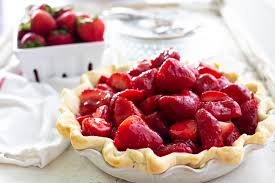

----------------------------------------
📷 Image: img_531.jpeg
 → Predicted: 0 strawbarry
 → Confidence: 100.00%


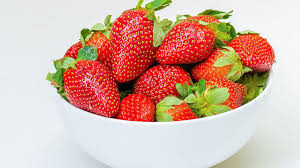

----------------------------------------
📷 Image: img_551.jpeg
 → Predicted: 0 strawbarry
 → Confidence: 100.00%


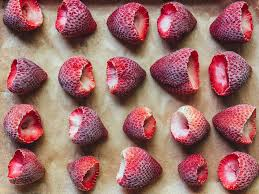

----------------------------------------
📷 Image: img_591.jpeg
 → Predicted: 0 strawbarry
 → Confidence: 100.00%


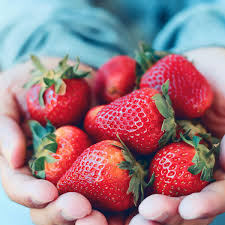

----------------------------------------
📷 Image: img_601.jpeg
 → Predicted: 0 strawbarry
 → Confidence: 100.00%


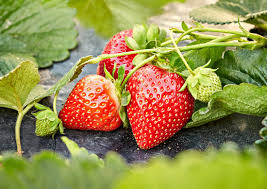

----------------------------------------
📷 Image: img_611.jpeg
 → Predicted: 0 strawbarry
 → Confidence: 100.00%


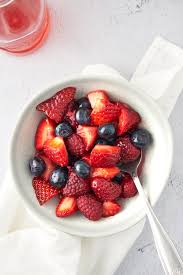

----------------------------------------
📷 Image: img_621.jpeg
 → Predicted: 0 strawbarry
 → Confidence: 100.00%


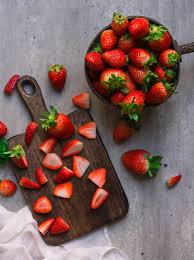

----------------------------------------
📷 Image: img_641.jpeg
 → Predicted: 0 strawbarry
 → Confidence: 95.88%


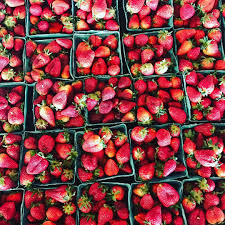

----------------------------------------
📷 Image: img_671.jpeg
 → Predicted: 0 strawbarry
 → Confidence: 100.00%


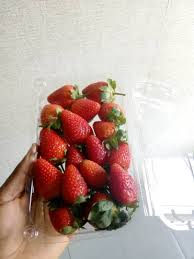

----------------------------------------
📷 Image: img_681.jpeg
 → Predicted: 0 strawbarry
 → Confidence: 100.00%


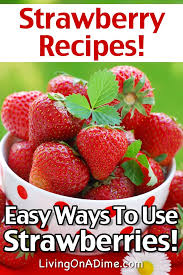

----------------------------------------
📷 Image: img_691.jpeg
 → Predicted: 0 strawbarry
 → Confidence: 99.73%


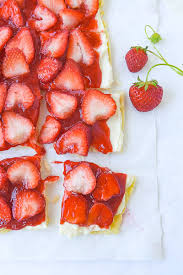

----------------------------------------
📷 Image: img_11.jpeg
 → Predicted: 1 mango
 → Confidence: 100.00%


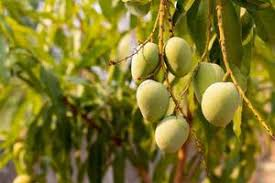

----------------------------------------
📷 Image: img_31.jpeg
 → Predicted: 1 mango
 → Confidence: 100.00%


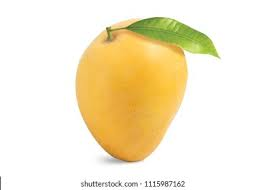

----------------------------------------
📷 Image: img_41.jpeg
 → Predicted: 1 mango
 → Confidence: 100.00%


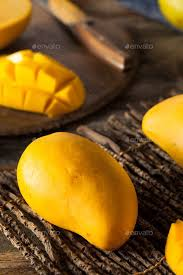

----------------------------------------
📷 Image: img_51.jpeg
 → Predicted: 1 mango
 → Confidence: 100.00%


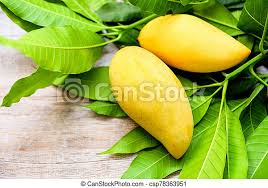

----------------------------------------
📷 Image: img_61.jpeg
 → Predicted: 1 mango
 → Confidence: 100.00%


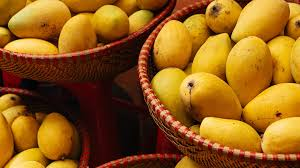

----------------------------------------
📷 Image: img_71.jpeg
 → Predicted: 1 mango
 → Confidence: 100.00%


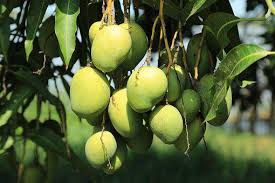

----------------------------------------
📷 Image: img_81.jpeg
 → Predicted: 1 mango
 → Confidence: 100.00%


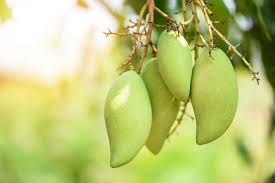

----------------------------------------
📷 Image: img_91.jpeg
 → Predicted: 1 mango
 → Confidence: 100.00%


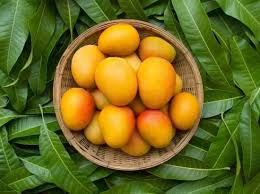

----------------------------------------
📷 Image: img_101.jpeg
 → Predicted: 1 mango
 → Confidence: 100.00%


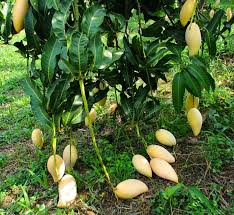

----------------------------------------

✅ Summary:
Total images processed: 20
Expected class: mango

- 0 strawbarry: 11 images, Avg Confidence: 99.6%
- 1 mango: 9 images, Avg Confidence: 100.0%


In [8]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np
from google.colab import files
import io
from collections import defaultdict
from IPython.display import display, Image as IPImage

# Load the model from the specified path
model = load_model("/content/keras_model.h5", compile=False)

# Load the class names from the specified path
with open("/content/labels.txt", "r") as f:
    class_names = [label.strip() for label in f.readlines()]

uploaded = files.upload()

size = (224, 224)
total_images = 0
class_counts = defaultdict(int)
class_confidence_sum = defaultdict(float)

for filename in uploaded.keys():
    total_images += 1

    image = Image.open(io.BytesIO(uploaded[filename])).convert("RGB")
    image = ImageOps.fit(image, size, Image.Resampling.LANCZOS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    data[0] = normalized_image_array

    prediction = model.predict(data, verbose=0)
    index = np.argmax(prediction)
    class_name = class_names[index]
    confidence_score = prediction[0][index]

    class_counts[class_name] += 1
    class_confidence_sum[class_name] += confidence_score

    print(f"📷 Image: {filename}")
    print(f" → Predicted: {class_name.strip()}")
    print(f" → Confidence: {confidence_score*100:.2f}%")
    display(IPImage(filename))  # Display the image
    print("-" * 40)

print("\n✅ Summary:")
print("Total images processed:", total_images)
print("Expected class: mango\n")

for class_name in class_names:
    count = class_counts[class_name]
    if count > 0:
        avg_conf = (class_confidence_sum[class_name] / count) * 100
        print(f"- {class_name.strip()}: {count} images, Avg Confidence: {round(avg_conf, 2)}%")
    else:
        print(f"- {class_name.strip()}: 0 images")

wrong_class = "strawberry"
if any(wrong_class.lower() in k.lower() for k in class_counts):
    print(f"\n⚠️ Warning: {class_counts[wrong_class]} image(s) misclassified as {wrong_class}")

Please upload your `keras_model.h5` and `labels.txt` files.

In [3]:
from google.colab import files

uploaded_model = files.upload()
uploaded_labels = files.upload()

Saving keras_model.h5 to keras_model.h5


Saving labels.txt to labels (1).txt
